<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pytorch-Activation-Functions" data-toc-modified-id="Pytorch-Activation-Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pytorch Activation Functions</a></span><ul class="toc-item"><li><span><a href="#Data-Generation" data-toc-modified-id="Data-Generation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Generation</a></span></li><li><span><a href="#Functions-List" data-toc-modified-id="Functions-List-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Functions List</a></span></li><li><span><a href="#Separete-Plot" data-toc-modified-id="Separete-Plot-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Separete Plot</a></span></li><li><span><a href="#Same-Axis-Plot" data-toc-modified-id="Same-Axis-Plot-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Same Axis Plot</a></span></li></ul></li></ul></div>

## Pytorch Activation Functions
 - [pytorch documentation](https://pytorch.org/docs/master/nn.html#non-linear-activations-weighted-sum-nonlinearity)
 - [explanation by ml-cheatsheet](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html)
 

In [1]:
import torch
from torch import nn, functional as F
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set_style("whitegrid")

### Data Generation

In [2]:
X_LIM = [-10, 10]
N = 500

x = torch.FloatTensor(N).uniform_(*X_LIM)
x, _ = torch.sort(x)

### Functions List

In [3]:
activations_list = nn.ModuleList([
    nn.ReLU(),
    nn.LeakyReLU(negative_slope=.1),
    nn.RReLU(upper=.3),
    # nn.PReLU(),
    nn.ELU(alpha=1), # Exponential Linear Unit
    nn.SELU(),
    nn.CELU(alpha=1),
    nn.Softplus(),
    nn.ReLU6(),

    nn.Hardtanh(),
    nn.Sigmoid(),
    nn.Softsign(),
    nn.Tanh(),

    nn.Softshrink(lambd=2),
    nn.Hardshrink(lambd=2), 
    nn.Tanhshrink(),

    nn.LogSigmoid(),
    nn.Threshold(threshold=0, value=-5)
])

### Separete Plot

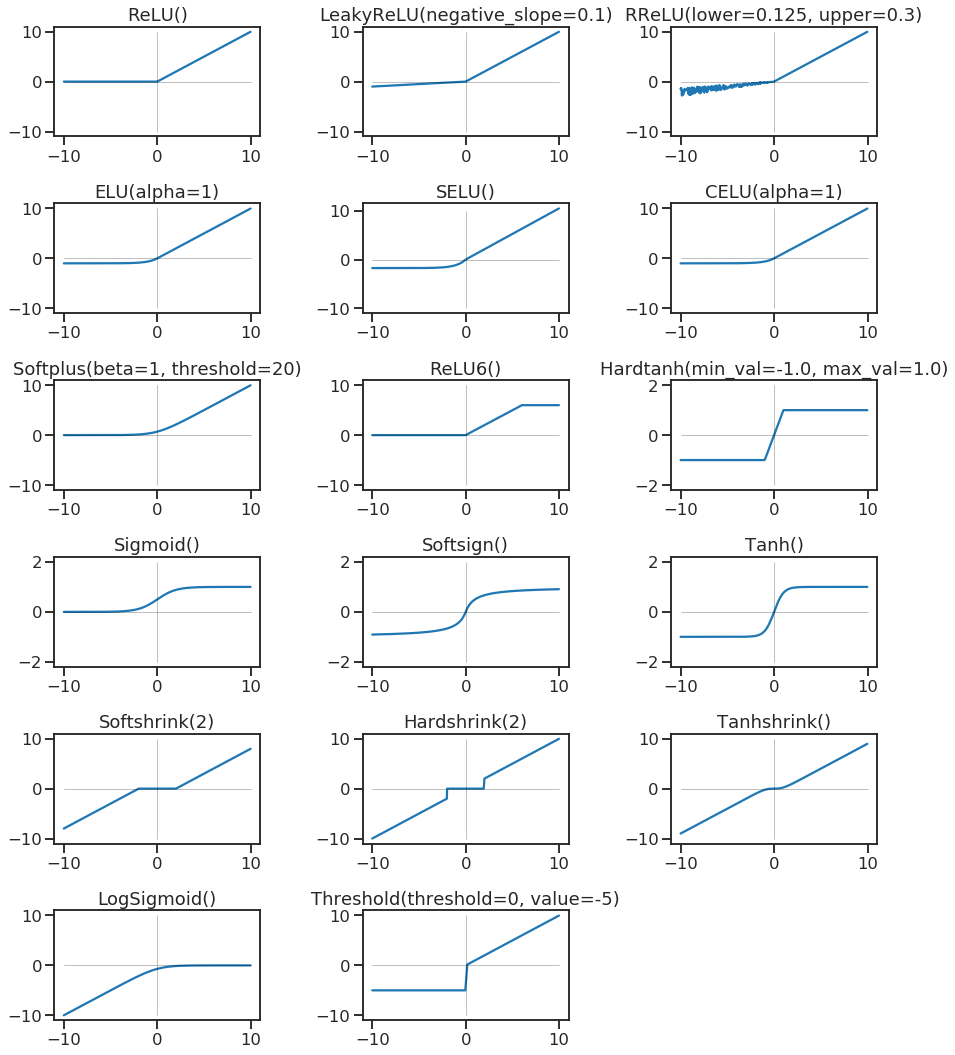

In [4]:
sns.set_style("ticks")
sns.set_context("talk")

nrow, ncol = 6, 3
fig, axs = plt.subplots(nrow, ncol, sharey=False)
for ind, f in enumerate(activations_list):
    f_x = f(x).numpy()
    a = axs[ind//ncol, ind % ncol]
    a.set_title(str(f))
    a.plot(x.numpy(), f_x)
    a.plot(X_LIM, [0, 0], "k-", lw=.5, alpha=.5)
    y_lim = X_LIM
    if max(f_x) < 2 and min(f_x) > -2:
        y_lim = [-2, 2]
    a.plot([0, 0], y_lim, "k-", lw=.5, alpha=.5)
axs[-1, -1].set_visible(False)
fig.set_size_inches(ncol * 4.5, nrow * 2.5)
fig.tight_layout()

### Same Axis Plot

In [5]:
activations_list_same = nn.ModuleList([
    nn.Hardtanh(),
    nn.Hardtanh(0, 1),
    nn.Sigmoid(),
    nn.Softsign(),
    nn.Tanh()
])

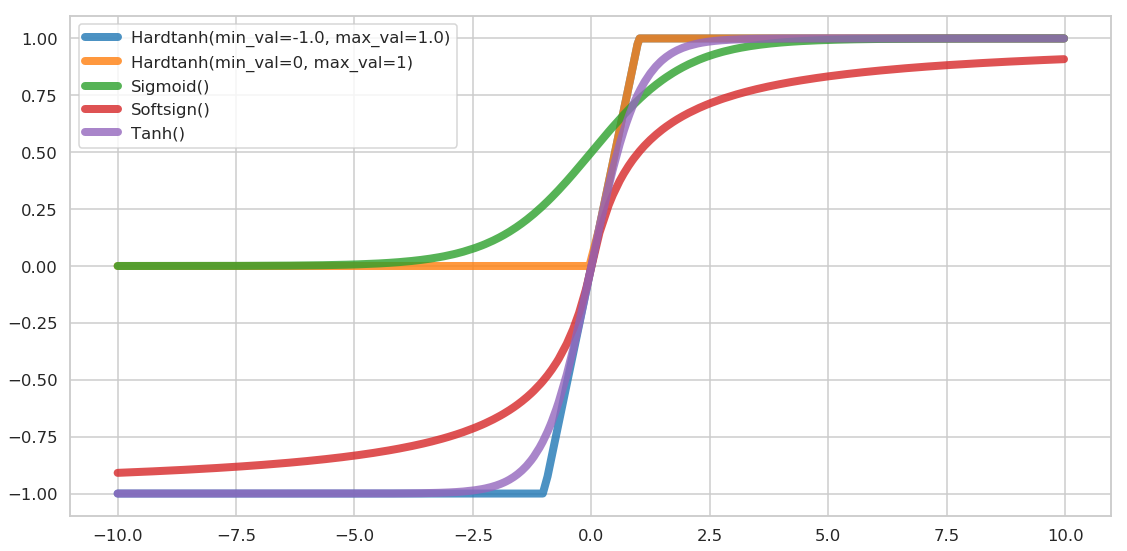

In [6]:
sns.set_style("whitegrid")
sns.set_context("talk")
fig, a = plt.gcf(), plt.gca()
for ind, f in enumerate(activations_list_same):
    a.plot(x.numpy(), f(x).numpy(), label=str(f), lw=8, alpha=.8)
    plt.plot()
plt.legend()
fig.set_size_inches(16, 8)
fig.tight_layout()